<a href="https://colab.research.google.com/github/Gideon18-web/Data-Analysis-/blob/main/Maingi_Gideon_Health_kenya_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
custom_palette = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#4CAF50", "#FFC107"]


In [ ]:
# Load the dataset
df = pd.read_csv('health_ken.csv')
df.head(10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Kenya,KEN,2014,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,25.5
2,Kenya,KEN,2022,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,17.5
3,Kenya,KEN,2014,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,21
4,Kenya,KEN,2009,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,30.9
5,Kenya,KEN,2003,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,45.9
6,Kenya,KEN,2022,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,6.4
7,Kenya,KEN,2014,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,7
8,Kenya,KEN,2009,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,13.4
9,Kenya,KEN,2003,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,16.3


In [ ]:
df.tail(10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
10090,Kenya,KEN,2005,Increase in poverty gap at $3.10 ($ 2011 PPP) ...,SH.UHC.NOP2.CG,0.0336447
10091,Kenya,KEN,1997,Increase in poverty gap at $3.10 ($ 2011 PPP) ...,SH.UHC.NOP2.CG,0.0594955
10092,Kenya,KEN,2005,Number of people pushed below the $3.10 ($ 201...,SH.UHC.NOP2.TO,580000
10093,Kenya,KEN,1997,Number of people pushed below the $3.10 ($ 201...,SH.UHC.NOP2.TO,506000
10094,Kenya,KEN,2005,Increase in poverty gap at $3.10 ($ 2011 PPP) ...,SH.UHC.NOP2.ZG,1.08531
10095,Kenya,KEN,1997,Increase in poverty gap at $3.10 ($ 2011 PPP) ...,SH.UHC.NOP2.ZG,1.91921
10096,Kenya,KEN,2005,Number of people spending more than 10% of hou...,SH.UHC.OOPC.10.TO,2101000
10097,Kenya,KEN,1997,Number of people spending more than 10% of hou...,SH.UHC.OOPC.10.TO,1715000
10098,Kenya,KEN,2005,Number of people spending more than 25% of hou...,SH.UHC.OOPC.25.TO,544000
10099,Kenya,KEN,1997,Number of people spending more than 25% of hou...,SH.UHC.OOPC.25.TO,513000


In [ ]:
#data structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    10100 non-null  object
 1   Country ISO3    10100 non-null  object
 2   Year            10100 non-null  object
 3   Indicator Name  10100 non-null  object
 4   Indicator Code  10100 non-null  object
 5   Value           10100 non-null  object
dtypes: object(6)
memory usage: 473.6+ KB


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64


DATA CLEANING AND PREPARATION

In [ ]:
# Remove metadata rows (first two rows)
df_clean = df.iloc[2:].reset_index(drop=True)

# Rename columns for clarity
df_clean.columns = [ 'Country', 'Country_Code', 'Year', 'Indicator_Name', 'Indicator_Code', 'Value']

# Convert data types
df_clean['Year'] = pd.to_numeric(df_clean['Year'])
df_clean['Value'] = pd.to_numeric(df_clean['Value'], errors='coerce')

# Filter for Kenya only
df_kenya = df_clean[df_clean['Country_Code'] == 'KEN'].copy()

# Handle missing values - forward fill within each indicator group
df_kenya['Value'] = df_kenya.groupby('Indicator_Code')['Value'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)

# Create new columns for analysis
# 1. Decade column
df_kenya['Decade'] = (df_kenya['Year'] // 10) * 10

# 2. Health category mapping
def map_health_category(code):
    if code.startswith('SG.VAW'):
        return 'Gender-Based Violence'
    elif code.startswith('SH.ALC'):
        return 'Alcohol Consumption'
    elif code.startswith('SH.ANM'):
        return 'Anemia Prevalence'
    elif code.startswith('SH.DTH'):
        return 'Mortality Statistics'
    elif code.startswith('SH.DYN'):
        return 'HIV/AIDS'
    else:
        return 'Other Health Indicators'

df_kenya['Health_Category'] = df_kenya['Indicator_Code'].apply(map_health_category)

# 3. Demographic group mapping
def map_demographic(indicator):
    indicator_lower = indicator.lower()
    if 'children' in indicator_lower:
        return 'Children'
    elif 'women' in indicator_lower:
        return 'Women'
    elif 'infant' in indicator_lower or 'neonatal' in indicator_lower:
        return 'Infants'
    elif 'male' in indicator_lower:
        return 'Men'
    else:
        return 'General Population'

df_kenya['Demographic_Group'] = df_kenya['Indicator_Name'].apply(map_demographic)

# 4. Create indicator type (rate vs count)
def map_indicator_type(indicator):
    if 'rate' in indicator.lower() or 'prevalence' in indicator.lower() or 'percentage' in indicator.lower():
        return 'Rate/Percentage'
    elif 'deaths' in indicator.lower() or 'number' in indicator.lower():
        return 'Count'
    else:
        return 'Other'

df_kenya['Indicator_Type'] = df_kenya['Indicator_Name'].apply(map_indicator_type)

# 5. Create time period category
def map_time_period(year):
    if year < 1990:
        return 'Pre-1990'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    else:
        return '2020s'

df_kenya['Time_Period'] = df_kenya['Year'].apply(map_time_period)

# Display cleaned data info
print("\nCleaned Dataset Info:")
df_kenya.info()

# Save cleaned data
df_kenya.to_csv('kenya_health_cleaned.csv', index=False)


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            10098 non-null  object 
 1   Country_Code       10098 non-null  object 
 2   Year               10098 non-null  int64  
 3   Indicator_Name     10098 non-null  object 
 4   Indicator_Code     10098 non-null  object 
 5   Value              10098 non-null  float64
 6   Decade             10098 non-null  int64  
 7   Health_Category    10098 non-null  object 
 8   Demographic_Group  10098 non-null  object 
 9   Indicator_Type     10098 non-null  object 
 10  Time_Period        10098 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 867.9+ KB


EXPLANATORY DATA ANALYSIS


Summary Statistics:
               Year         Value        Decade
count  10098.000000  1.009800e+04  10098.000000
mean    1998.554367  7.050186e+05   1994.126560
std       17.095948  3.641522e+06     17.214532
min     1960.000000 -1.154360e+05   1960.000000
25%     1987.000000  5.200000e+00   1980.000000
50%     2003.000000  3.010000e+01   2000.000000
75%     2013.000000  8.047119e+01   2010.000000
max     2024.000000  5.643294e+07   2020.000000


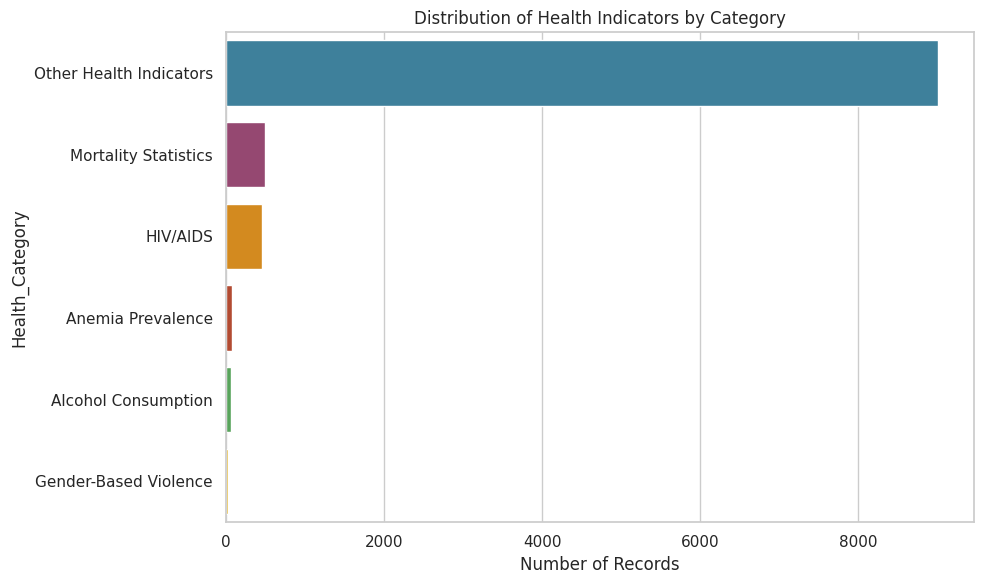

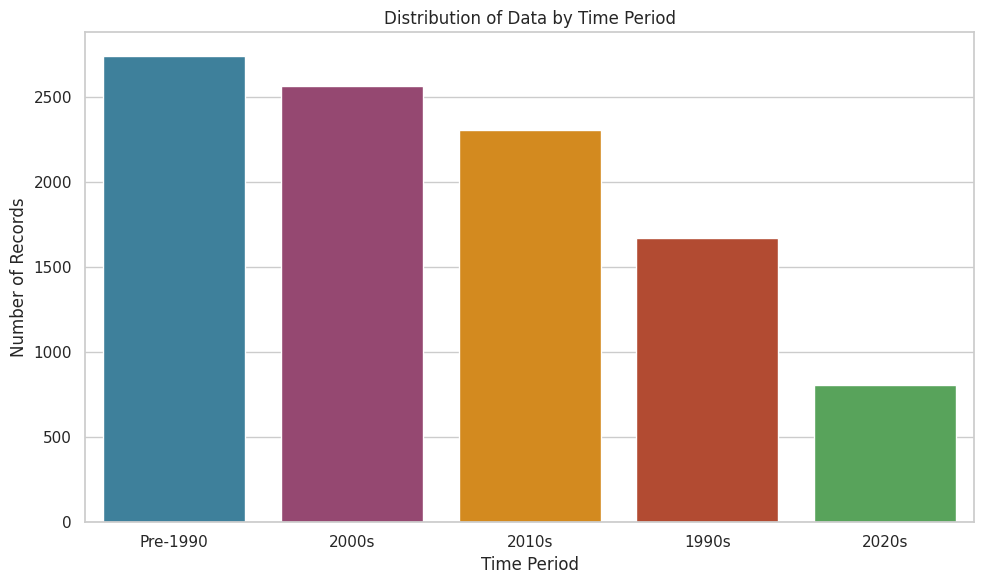

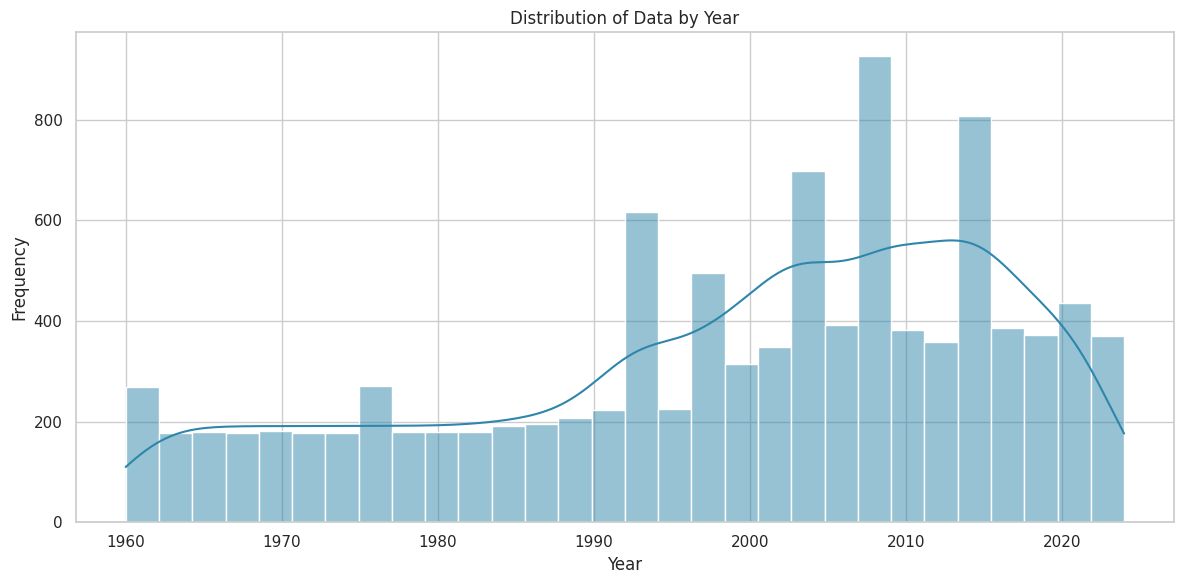

In [ ]:
# Load cleaned data
df = pd.read_csv('kenya_health_cleaned.csv')

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Health category distribution
plt.figure(figsize=(10, 6))
health_counts = df['Health_Category'].value_counts()
sns.barplot(x=health_counts.values, y=health_counts.index, palette=custom_palette)
plt.title('Distribution of Health Indicators by Category')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.savefig('health_category_distribution.png')
plt.show()

# Time period distribution
plt.figure(figsize=(10, 6))
time_counts = df['Time_Period'].value_counts()
sns.barplot(x=time_counts.index, y=time_counts.values, palette=custom_palette)
plt.title('Distribution of Data by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.savefig('time_period_distribution.png')
plt.show()

# Year distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=30, kde=True, color="#2E86AB")
plt.title('Distribution of Data by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('year_distribution.png')
plt.show()